<h1><center>Breast Cancer Prediction</center></h1>
<h4><center>Using Decision Tree Classifier</center></h4>

In [2]:
# Importing Required Modules and Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing some score related modules

from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as accuracy

In [4]:
# Defining Root Meansquared Error as Square

def score(x, Y):
    RMSE = sqrt(mse(x, Y))
    print("Root Mean Squared Error: ", RMSE)

<h4><center>Dataset Information</center></h4>
<p><center><a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra">Dataset Link</a></center></p>
<ul>
  <li>There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.</li>
  <li>The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.</li>
  <li>Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.</li>
  <li>This dataset is pre-cleaned so there is no need for Data Cleaning Process to be done.</li>
</ul>

In [5]:
# Importing data.csv as dataset

dataset = pd.read_csv("data.csv")

In [6]:
# Displaying the first 10 rows of the dataset

dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
# Displaying Dataset's Shape

print("Dataset's Shape:", dataset.shape)

Dataset's Shape: (116, 10)


In [8]:
# Describing the Dataset's Data

dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


##### As per the description, the "Classification" Column is the Target Variable.

In [9]:
# Dispayin

dataset['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

In [11]:
# Selecting Target Variable as Classification and storing it in Y

x = dataset.drop(columns = 'Classification', axis=1)
Y = dataset['Classification']

In [12]:
print(x)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554.697  
3    12.76600  928.220 

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]


In [17]:
x = standardized_data
Y = dataset['Classification']

In [18]:
print(x)

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.25, stratify = Y, random_state = 42)

In [22]:
print("Original x Shape:", x.shape, "\nx_train Shape:",  x_train.shape, "\nx_test Shape:", x_test.shape)

Original x Shape: (116, 9) 
x_train Shape: (87, 9) 
x_test Shape: (29, 9)


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
train_prediction = model.predict(x_train)
train_accuracy = accuracy(train_prediction, Y_train)
print("Accuracy Score of Training Data: ", train_accuracy)
score(train_prediction, Y_train)

Accuracy Score of Training Data:  1.0
Root Mean Squared Error:  0.0


In [29]:
test_prediction = model.predict(x_test)
test_accuracy = accuracy(test_prediction, Y_test)
print("Accuracy Score of the Testing Data: ", test_accuracy)
score(test_prediction, Y_test)

Accuracy Score of the Testing Data:  0.6551724137931034
Root Mean Squared Error:  0.5872202195147035


In [30]:
from sklearn import tree

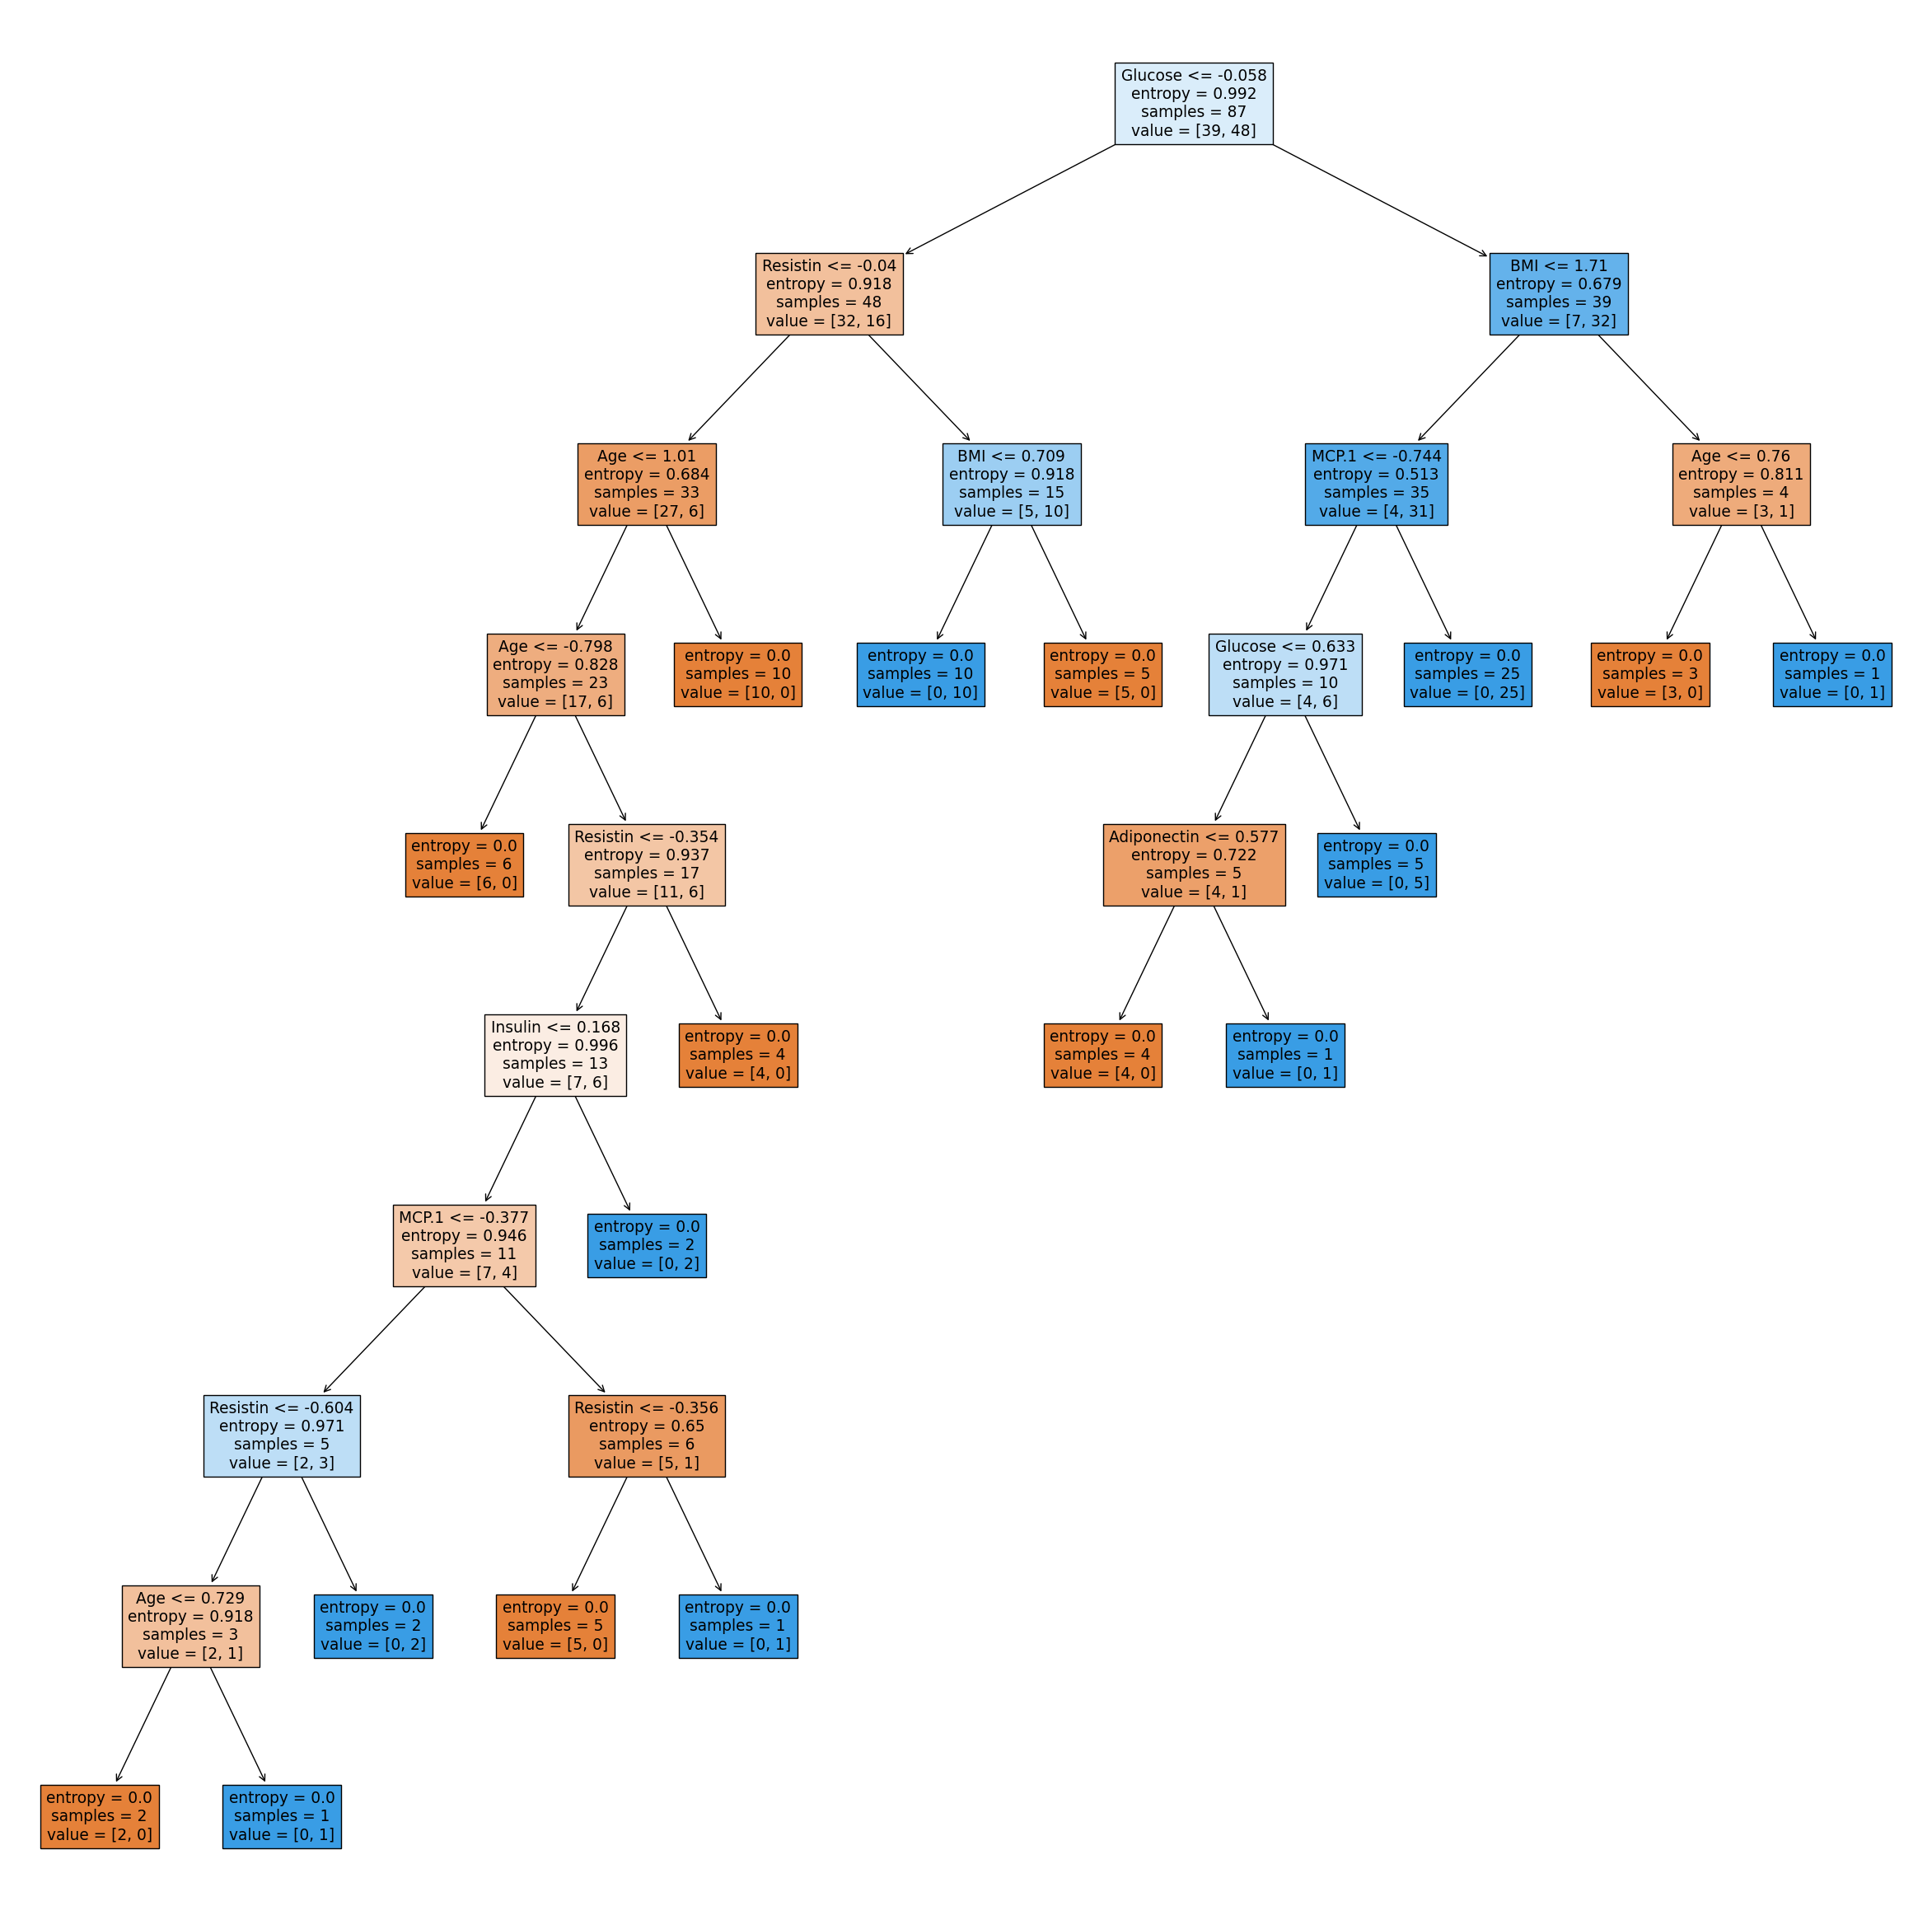

In [34]:
figure = plt.figure(figsize = (30,30))
feature_names = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
tree_plot = tree.plot_tree(model.fit(x_train, Y_train),feature_names = feature_names,filled=True)

In [36]:
print("Age (years)\nBMI (kg/m2)\nGlucose (mg/dL)\nInsulin (µU/mL)\nHOMA\nLeptin (ng/mL)\nAdiponectin (µg/mL)\nResistin (ng/mL)\nMCP-1(pg/dL)")

Age (years)
BMI (kg/m2)
Glucose (mg/dL)
Insulin (µU/mL)
HOMA
Leptin (ng/mL)
Adiponectin (µg/mL)
Resistin (ng/mL)
MCP-1(pg/dL)


In [37]:
input_data = []
Age=input("Enter Age: ")
input_data.append(Age)
BMI=input("Enter BMI: ")
input_data.append(BMI)
Glucose=input("Enter Blood Glucose: ")
input_data.append(Glucose)
Insulin=input("Enter Isulin Level: ")
input_data.append(Insulin)
HOMA=input("Enter HOMA Value: ")
input_data.append(HOMA)
Leptin=input("Enter Leptin Level: ")
input_data.append(Leptin)
Adip=input("Enter Adiponectin Value: ")
input_data.append(Adip)
Resistin=input("Enter Resistin Value: ")
input_data.append(Resistin)
MCP=input("Enter MCP.1 Value: ")
input_data.append(MCP)

In [39]:
input_data = np.asarray(input_data)
input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if (prediction[0] == 1):
  print('The Person is Normal')
else:
  print('The Person is a Patient')

The Person is a Patient
